# Detección de Fraude en Transacciones Bancarias

### Descripción del Proyecto
Este proyecto simula transacciones bancarias con datos de transacciones y detecta patrones de fraude.  
Se analizan transacciones sospechosas usando Python y Power BI.

## Objetivos: 🔍 
✔️ **Montos inusualmente altos**.  
✔️ **Métodos de pago sospechosos (Ej: Criptomonedas en grandes cantidades)**.  
✔️ **Usuarios con transacciones en distintos países en un tiempo corto**.  

## Visualización en Power BI? 📊
1️⃣ **Mapa de transacciones** 📍: Ubicaciones de las transacciones por usuario.  
2️⃣ **Gráfico de tiempo** ⏳: Identifica usuarios con actividad en lugares distantes en minutos.  
3️⃣ **Lista de usuarios sospechosos** ⚠️: Quiénes tienen más actividad fraudulenta.  

## Archivos del Proyecto 📂
- `transacciones_fraudulentas.csv` → Dataset con transacciones.  
- `fraude_bancario.ipynb` → Notebook con código.  
- `fraude_bancario.pbix` → Reporte en Power BI *(Próximamente)*.  

In [1]:
#librairies
from faker import Faker
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Initialize Faker
fake = Faker()

num_transactions = 10_000  # Number of transactions to generate
num_users = 500  # Number of unique users

# Fraud probability (5,7% fraud)
fraud_probability = 0.057

# Dictionary of locations with coordinates (latitude, longitude)
locations = {
    "Chile": (-33.4489, -70.6693),
    "Argentina": (-34.6037, -58.3816),
    "Colombia": (4.6100, -74.0833),
    "Peru": (-12.0464, -77.0428),
    "Mexico": (19.4326, -99.1332),
    "Cuba": (23.1136, -82.3666),
    "USA": (40.7128, -74.0060),
    "Brazil": (-23.5505, -46.6333),
}

# Payment methods and their probabilities in normal transactions
payment_methods = ['Credit Card', 'Debit', 'Bank Transfer', 'Cryptocurrency']
payment_probabilities = [0.35, 0.35, 0.25, 0.05]  # Adjusted probabilities

# Fraudulent payment method probabilities
fraud_payment_probabilities = [0.25, 0.2, 0.2, 0.35]  # More fraud in cryptocurrency

# Generate a list of users that will be reused across multiple transactions
users = [fake.uuid4() for _ in range(num_users)]

data = []  # List to store transaction data

for _ in range(num_transactions):
    user_id = random.choice(users)  # Select a random user
    
    # Choose a random location
    country, (lat, lon) = random.choice(list(locations.items()))
    
    # Introduce slight variations in the location to simulate real data
    lat += np.random.uniform(-0.5, 0.5)
    lon += np.random.uniform(-0.5, 0.5)
    
    # Determine if the transaction is fraudulent
    is_fraud = np.random.choice([0, 1], p=[1 - fraud_probability, fraud_probability])  

    # Assign payment method based on probability
    if is_fraud == 1:
        amount = round(np.random.uniform(3000, 30_000), 2)  # Higher fraudulent amounts
        payment_method = np.random.choice(payment_methods, p=fraud_payment_probabilities)  # Fraud-prone methods
    else:
        amount = round(np.random.uniform(10, 5000), 2)  # Normal amount
        payment_method = np.random.choice(payment_methods, p=payment_probabilities)  # Normal methods

    # Append transaction to the list
    data.append([
        fake.uuid4(),  # Unique transaction ID
        user_id,  # User ID (repeated in multiple transactions)
        fake.date_time_this_year(),  # Date and time
        lat,  # Latitude
        lon,  # Longitude
        amount,  # Transaction amount
        payment_method,  # Payment method
        is_fraud,  # 1 = Fraud, 0 = Normal
        country  # Country name
    ])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Transaction_ID', 'User_ID', 'Date', 'Latitude', 'Longitude', 'Amount', 'Payment_Method', 'Fraud', 'Location'])

# Save as CSV for Power BI
df.to_csv('fraudulent_transactions.csv', index=False)

print("✅ Dataset generated and saved as 'fraudulent_transactions.csv'")

df.head()

✅ Dataset generated and saved as 'fraudulent_transactions.csv'


,Transaction_ID,User_ID,Date,Latitude,Longitude,Amount,Payment_Method,Fraud,Location
0,f23c529d-2e68-4262-9dcc-2fbb283b0d1c,be99d658-5b03-4820-81fa-d844f6c1b177,2025-06-26 01:08:46,40.315906,-74.383172,4227.46,Bank Transfer,0,USA
1,b69b0e78-984d-46df-82c9-0fff1eccb590,e4b3bb4f-76d5-4554-9431-c517f76698fd,2025-02-28 09:19:26,40.715858,-74.069569,548.06,Credit Card,0,USA
2,ccfeb7cf-5990-4059-8d23-562df366b42e,77dc3ab5-5c6c-4c08-b50d-f92476d05e6e,2025-02-07 18:53:18,-23.758750,-47.091660,496.96,Credit Card,0,Brazil
3,d4719b32-a2c8-4227-8cf9-39a7e2768d6b,d5d14583-ba51-4821-8c9e-63de2bd42057,2025-02-11 13:32:16,40.444489,-73.904831,683.87,Credit Card,0,USA
4,0361d6f6-9aa1-4a34-ad27-01f385d6e54e,ddb6f081-6a90-47d6-966a-3e7ace02df70,2025-05-05 07:52:34,23.025686,-82.268227,4600.05,Bank Transfer,0,Cuba


In [3]:
#count number of rows equal to 1 in Fraud column
fraud_count = df['Fraud'].value_counts().get(1, 0)
print(f"Number of fraudulent transactions: {fraud_count}")  

Number of fraudulent transactions: 581


c:\Users\ivana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


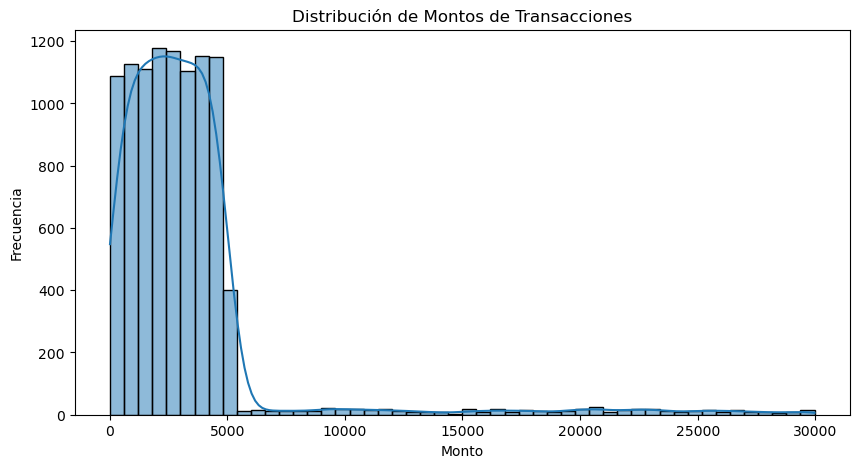

In [5]:
# Distribución de montos
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribución de Montos de Transacciones')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

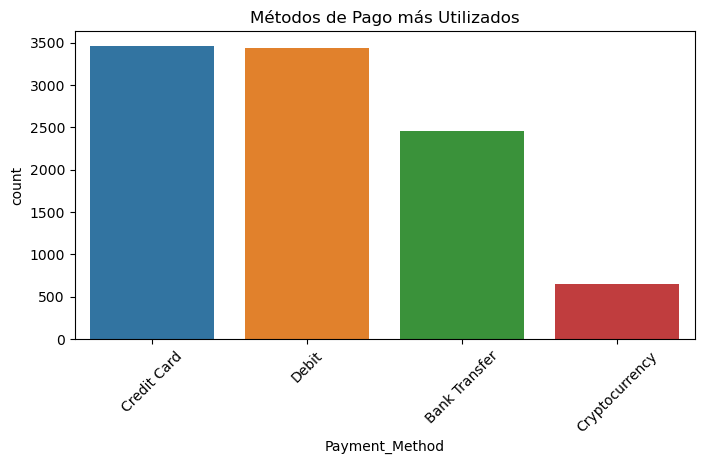

In [6]:
# Métodos de pago más utilizados
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Payment_Method', order=df['Payment_Method'].value_counts().index)
plt.title('Métodos de Pago más Utilizados')
plt.xticks(rotation=45)

plt.show()